## Loading the necessary libraries
This loads the function for predecting synthesizability of materials plus all the Machine Learning and Deep Learning requirnments including: Keras, TensorFlow, Sklearn

In [1]:
from predict_synthesis import *
# To allow pandas display long filenames in the table. The default value is 50
pd.set_option('display.max_colwidth', 100)
pd.options.display.max_rows = 50

ModuleNotFoundError: No module named 'predict_synthesis'

## Loading all the electrode materials candidates CIF files 
All the candidates were collected from the [MP Battery Explorer](https://materialsproject.org/#search/batteries/). 
These test samples can be any types of crystal structures. And it accepts any supperted format by the [ASE io.read()](https://wiki.fysik.dtu.dk/ase/ase/io/io.html). In case of using other formats you should mentioned when you use the CIF Parse or the synthesizability predictor.
```python
cif_parser(filename, format='vasp') # for parsing POSCAR
predict_crystal_synthesis(filename, format='cif')
```

In [2]:
cif_files = list_all_files('test_electrode_materials_samples/cif/', pattern=r'[0-9]*/*.cif')
cif_files

['test_electrode_materials_samples/cif/000/mp-1013899.cif',
 'test_electrode_materials_samples/cif/000/mp-1176557.cif',
 'test_electrode_materials_samples/cif/000/mp-1176596.cif',
 'test_electrode_materials_samples/cif/000/mp-1178061.cif',
 'test_electrode_materials_samples/cif/000/mp-1661648.cif',
 'test_electrode_materials_samples/cif/000/mp-19755.cif',
 'test_electrode_materials_samples/cif/000/mp-26221.cif',
 'test_electrode_materials_samples/cif/000/mp-26546.cif',
 'test_electrode_materials_samples/cif/000/mp-26611.cif',
 'test_electrode_materials_samples/cif/000/mp-26789.cif',
 'test_electrode_materials_samples/cif/000/mp-26902.cif',
 'test_electrode_materials_samples/cif/000/mp-27007.cif',
 'test_electrode_materials_samples/cif/000/mp-31885.cif',
 'test_electrode_materials_samples/cif/000/mp-38487.cif',
 'test_electrode_materials_samples/cif/000/mp-673119.cif',
 'test_electrode_materials_samples/cif/000/mp-673144.cif',
 'test_electrode_materials_samples/cif/000/mp-694534.cif',
 

## Visualizer
Use below to visualize some of the electrode samples.
If you don't have [ngl viewer](http://nglviewer.org/nglview/latest/index.html) install it with this command: 
```bash
$ conda install nglview -c bioconda

```
If nothing didn't show up restart jupyter and try again and if still had a problem, try:
```bash
$ jupyter-nbextension enable nglview --py --sys-prefix
$ jupyter labextension install  nglview-js-widgets
```
Instead you can use 
```python
viewer='x3d'
```
as well.

In [3]:
from ase.visualize import view
from cod_tools import cif_parser

crystal = cif_parser(cif_files[1])
view(crystal, viewer='ngl')
# view(crystal, viewer='x3d')
# view(crystal)

## Predicting synthesizability likelihood
Structures not meeting the constraint of the predictor can not be predicted. 

In [8]:
random.Random(0).shuffle(cif_files)
n_first_elements = 20
predictions = predict_crystal_synthesis(cif_files[:n_first_elements], save_tmp_encoded_atoms=True,
                                        redo_calc=False)

CAE: model/cae/
clf: model/classifiers/
Predicting     0/   20 : {'RandomForestClassifier': 0.5829, 'MLPClassifier': 0.0459, 'filename': 'test_electrode_materials_samples/cif/017/mvc-9992.cif'}
Predicting     1/   20 : {'RandomForestClassifier': 0.683, 'MLPClassifier': 0.2292, 'filename': 'test_electrode_materials_samples/cif/018/mvc-12621.cif'}
Predicting     2/   20 : {'RandomForestClassifier': 0.5812, 'MLPClassifier': 1.0, 'filename': 'test_electrode_materials_samples/cif/016/mp-1206176.cif'}
Predicting     3/   20 : {'RandomForestClassifier': 0.7221, 'MLPClassifier': 1.0, 'filename': 'test_electrode_materials_samples/cif/000/mp-754020.cif'}
Predicting     4/   20 : {'RandomForestClassifier': 0.7401, 'MLPClassifier': 0.1988, 'filename': 'test_electrode_materials_samples/cif/009/mp-765613.cif'}
Predicting     5/   20 : {'RandomForestClassifier': 0.6228, 'MLPClassifier': 1.0, 'filename': 'test_electrode_materials_samples/cif/011/mp-774863.cif'}
Predicting     6/   20 : {'RandomForestC

In [9]:
predictions

MLPClassifier  MLPClassifier_label  RandomForestClassifier  \
0          0.0459                 -1.0                  0.5829   
1          0.2292                 -1.0                  0.6830   
2          1.0000                  1.0                  0.5812   
3          1.0000                  1.0                  0.7221   
4          0.1988                 -1.0                  0.7401   
5          1.0000                  1.0                  0.6228   
6          1.0000                  1.0                  0.8600   
7          1.0000                  1.0                  0.9400   
8          1.0000                  1.0                  0.8800   
9          0.1726                 -1.0                  0.6210   
10         1.0000                  1.0                  0.9400   
11         1.0000                  1.0                  0.9600   
12         0.0544                 -1.0                  0.4663   
13         0.0519                 -1.0                  0.7418   
14         1.0000                  1.0                  0.9400   
15         1.0000                  1.0                  0.6434   
16         1.0000                  1.0                  0.8207   
17         1.0000                  1.0                  0.9800   
18         1.0000                  1.0                  0.8600   
19         1.0000                  1.0                  0.9600   

    RandomForestClassifier_label  \
0                           -1.0   
1                           -1.0   
2                           -1.0   
3                           -1.0   
4                           -1.0   
5                           -1.0   
6                           -1.0   
7                            1.0   
8                            1.0   
9                           -1.0   
10                           1.0   
11                           1.0   
12                          -1.0   
13                          -1.0   
14                           1.0   
15                          -1.0   
16                          -1.0   
17                           1.0   
18                          -1.0   
19                           1.0   

                                                   filename  \
0     test_electrode_materials_samples/cif/017/mvc-9992.cif   
1    test_electrode_materials_samples/cif/018/mvc-12621.cif   
2   test_electrode_materials_samples/cif/016/mp-1206176.cif   
3    test_electrode_materials_samples/cif/000/mp-754020.cif   
4    test_electrode_materials_samples/cif/009/mp-765613.cif   
5    test_electrode_materials_samples/cif/011/mp-774863.cif   
6   test_electrode_materials_samples/cif/017/mp-1101666.cif   
7    test_electrode_materials_samples/cif/016/mp-772044.cif   
8   test_electrode_materials_samples/cif/011/mp-1080658.cif   
9    test_electrode_materials_samples/cif/009/mp-759244.cif   
10    test_electrode_materials_samples/cif/000/mp-31885.cif   
11   test_electrode_materials_samples/cif/018/mp-779142.cif   
12   test_electrode_materials_samples/cif/006/mp-867541.cif   
13   test_electrode_materials_samples/cif/010/mp-867763.cif   
14   test_electrode_materials_samples/cif/016/mp-768122.cif   
15   test_electrode_materials_samples/cif/006/mp-760330.cif   
16    test_electrode_materials_samples/cif/013/mvc-1288.cif   
17   test_electrode_materials_samples/cif/001/mp-585400.cif   
18   test_electrode_materials_samples/cif/005/mp-752611.cif   
19   test_electrode_materials_samples/cif/003/mp-757563.cif   

    RandomForestClassifier_best_threshold  MLPClassifier_best_threshold  
0                                0.860895                      0.999799  
1                                0.860895                      0.999799  
2                                0.860895                      0.999799  
3                                0.860895                      0.999799  
4                                0.860895                      0.999799  
5                                0.860895                      0.999799  
6                 

# Plotting the electrode properties vs. synthesizability likelihood
Loading the properties collected from the [MP Battery Explorer](https://materialsproject.org/#search/batteries/)

In [6]:

properties = load_var('test_electrode_materials_samples/properties.pkl')
types = list(properties['batteries'][0].keys())
for i in list(properties['batteries'][0].keys()):
    properties[i] = None
for t in types:
    l = []
    for i in range(len(properties)):
        l.append(properties['batteries'][i][t])
    properties[t] = pd.Series(l)
properties

batteries  \
0     {'battid': 'mp-504791_Li', 'reduced_cell_formula': 'P(WO4)2', 'average_voltage': 2.3251851700000...   
1     {'battid': 'mp-763480_Li', 'reduced_cell_formula': 'P3W2O13', 'average_voltage': 3.2917476950000...   
2     {'battid': 'mp-1176966_Li', 'reduced_cell_formula': 'P8W3O29', 'average_voltage': 3.609671179999...   
3     {'battid': 'mvc-5592_Li', 'reduced_cell_formula': 'P2WO7', 'average_voltage': 3.2011691699999907...   
4     {'battid': 'mp-763566_Li', 'reduced_cell_formula': 'P2WO7', 'average_voltage': 2.438309054999995...   
5     {'battid': 'mp-761353_Li', 'reduced_cell_formula': 'P4WO13', 'average_voltage': 4.32337751249999...   
6     {'battid': 'mp-763403_Li', 'reduced_cell_formula': 'P4WO13', 'average_voltage': 5.21025043999998...   
7     {'battid': 'mp-761345_Li', 'reduced_cell_formula': 'P4WO12', 'average_voltage': 3.07479086000001...   
8     {'battid': 'mp-763392_Li', 'reduced_cell_formula': 'P4WO12', 'average_voltage': 3.32392276499999...   
9     {'battid': 'mp-763466_Li', 'reduced_cell_formula': 'P4WO12', 'average_voltage': 3.38883918499999...   
10    {'battid': 'mp-1176594_Li', 'reduced_cell_formula': 'P4WO12', 'average_voltage': 3.6462672550000...   
11    {'battid': 'mp-763463_Li', 'reduced_cell_formula': 'P4WO12', 'average_voltage': 3.52294928000001...   
12    {'battid': 'mp-767180_Li', 'reduced_cell_formula': 'MnOF3', 'average_voltage': 2.988995015000005...   
13    {'battid': 'mp-763875_Li', 'reduced_cell_formula': 'Mn3OF8', 'average_voltage': 3.65557720333333...   
14    {'battid': 'mp-767187_Li', 'reduced_cell_formula': 'Mn5OF11', 'average_voltage': 3.8262685100000...   
15    {'battid': 'mp-763854_Li', 'reduced_cell_formula': 'Mn3OF6', 'average_voltage': 3.67144823999999...   
16    {'battid': 'mp-765945_Li', 'reduced_cell_formula': 'Mn4OF8', 'average_voltage': 3.62771333749999...   
17    {'battid': 'mp-767172_Li', 'reduced_cell_formula': 'Mn2OF3', 'average_voltage': 3.03271489249999...   
18    {'battid': 'mp-765441_Li', 'reduced_cell_formula': 'Mn5O3F5', 'average_voltage': 2.7997646399999...   
19    {'battid': 'mp-764671_Li', 'reduced_cell_formula': 'Mn7O7F', 'average_voltage': 2.24233811000002...   
20    {'battid': 'mp-765267_Li', 'reduced_cell_formula': 'Fe(BO3)2', 'average_voltage': 4.468540839999...   
21    {'battid': 'mp-761783_Li', 'reduced_cell_formula': 'Co2Cu3O10', 'average_voltage': 3.58716613500...   
22    {'battid': 'mp-761730_Li', 'reduced_cell_formula': 'Co3CuO8', 'average_voltage': 3.1970808766666...   
23    {'battid': 'mp-540145_Li', 'reduced_cell_formula': 'Fe(PO3)5', 'average_voltage': 5.327178872500...   
24    {'battid': 'mp-1101552_Li', 'reduced_cell_formula': 'FeP4O13', 'average_voltage': 5.484298095000...   
25    {'battid': 'mp-1177017_Li', 'reduced_cell_formula': 'Fe3P8O29', 'average_voltage': 5.12280988999...   
26    {'battid': 'mp-540453_Li', 'reduced_cell_formula': 'FeP2O9', 'average_voltage': 4.62529954999999...   
27    {'battid': 'mp-1101549_Li', 'reduced_cell_formula': 'Fe4P9O32', 'average_voltage': 5.14481116833...   
28    {'battid': 'mp-762711_Li', 'reduced_cell_formula': 'Fe(PO4)2', 'average_voltage': 4.994523789999...   
29    {'battid': 'mp-762856_Li', 'reduced_cell_formula': 'Fe(PO4)2', 'average_voltage': 4.767807625000...   
30    {'battid': 'mp-697808_Li', 'reduced_cell_formula': 'Fe2P3O13', 'average_voltage': 4.411901124999...   
31    {'battid': 'mp-31779_Li', 'reduced_cell_formula': 'Fe2(PO4)3', 'average_voltage': 4.761582150000...   
32    {'battid': 'mp-540420_Li', 'reduced_cell_formula': 'Fe2(PO4)3', 'average_voltage': 5.47585603000...   
33    {'battid': 'mp-1013899_Li', 'reduced_cell_formula': 'Fe3P3O13', 'average_voltage': 5.07295877500...   
34    {'battid': 'mp-1048396_Li', 'reduced_cell_formula': 'FeP2O7', 'average_voltage': 5.3003117425000...   
35    {'battid': 'mp-1101522_Li', 'reduced_cell_formula': 'FeP2O7', 'average_voltage': 4.4639549800000...   
36    {'battid': 'mp-704185_Li', 'reduced_cell_formula': 'Fe4(P

Plotting the properties

(0.0, 1.0, 0.0, 1.0)

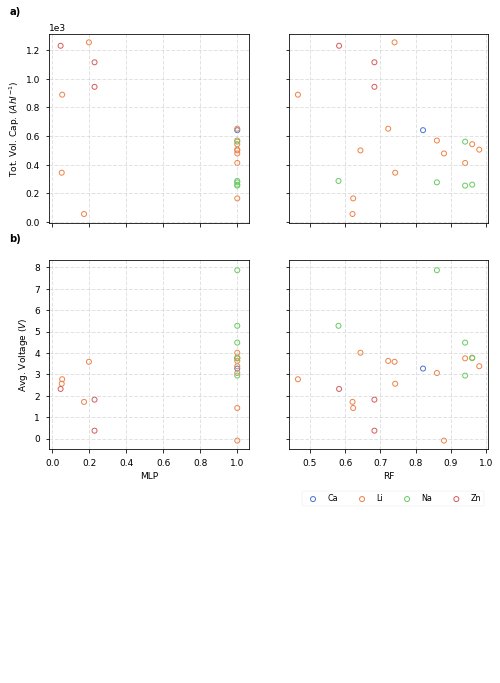

In [10]:
predictions['material_id'] = pd.Series([i.split('/')[-1].split('.cif')[0] for i in predictions['filename']])
df = predictions.merge(properties, on='material_id')
df = df.sample(frac=1)
df.reset_index(inplace=True)
df['Working ion'] = df['working_ion']
bat_dic = {
    'capacity_vol': 'Tot. Vol. Cap. ($AhI^{-1}$)',
    'average_voltage': 'Avg. Voltage ($V$)',
}
clf_labels = {
    'MLPClassifier': 'MLP',
    'RandomForestClassifier': 'RF',
    'BaggingClassifier': 'SVM-Bagging'
}
f, axs, fs = Plots.plot_format(200, equal_axis=True, ncols=2, nrows=3)
gs = axs[2, 0].get_gridspec()
# remove the underlying axes
for ax in axs[2, :]:
    ax.remove()
axbig = f.add_subplot(gs[2:, :])

plt_n = -1
clfs = ['MLPClassifier', 'RandomForestClassifier']
for p in bat_dic:
    df[p] = pd.Series([i[p] for i in df['batteries']])
    for c in clfs:
        plt_n += 1
        sub_plt_pos = np.unravel_index(plt_n, axs.shape)
        ax = axs[sub_plt_pos]
        pal = sns.color_palette("muted", np.unique(df['working_ion']).size)
        wi_order = np.unique(df['working_ion'])
        for wi in wi_order:
            ax.scatter(df[df['working_ion'] == wi][c],
                       df[df['working_ion'] == wi][p], s=25, facecolors='none', edgecolors=pal.pop(0),
                       linewidth=1., label=wi)
        ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
        if sub_plt_pos[1] == 0:
            ax.set_ylabel(bat_dic[p])
        else:
            Plots.remove_ticks(ax, axis='y', keep_ticks=True)
        if sub_plt_pos[0] == 1:
            ax.set_xlabel(f'{clf_labels[c]}')
        else:
            Plots.remove_ticks(ax, axis='x', keep_ticks=True)
        ax.grid()

Plots.annotate_subplots_with_abc(axs[:2, 0])
h, l = ax.get_legend_handles_labels()
axbig.legend(h, l, loc='best', ncol=4)
axbig.axis('off')
